## Import Pandas library and load the dataframe

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data_small/TG_STAID000001.txt', skiprows=20, parse_dates=['    DATE'])

In [30]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,FH,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


## Show certain rows

In [5]:
df[100:120]

,STAID,SOUID,DATE,TG,Q_TG
100,1,35381,1860-04-10,36,0
101,1,35381,1860-04-11,35,0
102,1,35381,1860-04-12,25,0
103,1,35381,1860-04-13,14,0
104,1,35381,1860-04-14,34,0
105,1,35381,1860-04-15,36,0
106,1,35381,1860-04-16,57,0
107,1,35381,1860-04-17,63,0
108,1,35381,1860-04-18,72,0
109,1,35381,1860-04-19,-1,0


## Show certain columns

In [6]:
df.columns
df[10:20][['   TG', '    DATE', ' Q_TG']]

,TG,DATE,Q_TG
10,-5,1860-01-11,0
11,-18,1860-01-12,0
12,-27,1860-01-13,0
13,-26,1860-01-14,0
14,-37,1860-01-15,0
15,-9,1860-01-16,0
16,7,1860-01-17,0
17,-6,1860-01-18,0
18,-16,1860-01-19,0
19,-19,1860-01-20,0


## Simple statistics and filtering

In [7]:
print(f"Average temperature: {df.loc[df[' Q_TG'] == 0]['   TG'].mean() / 10}")
print(f"Maximum temperature: {df.loc[df[' Q_TG'] == 0]['   TG'].max() / 10}")
print(f"Minimum temperature: {df.loc[df[' Q_TG'] == 0]['   TG'].min() / 10}")

Average temperature: 6.362732580037664
Maximum temperature: 26.2
Minimum temperature: -23.4


## Historgram

<Axes: >

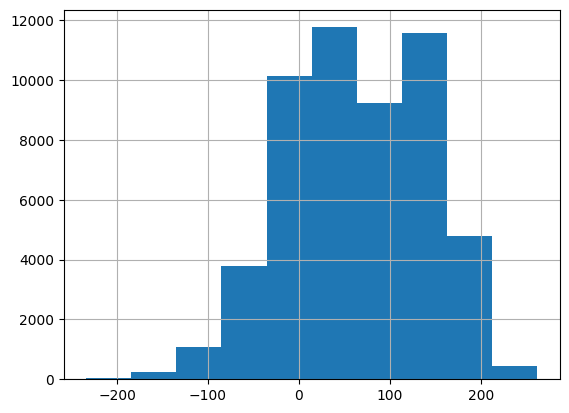

In [31]:
df.loc[df[' Q_TG'] == 0]['   TG'].hist()

## Get certain cells

In [18]:
df.loc[df['    DATE'] == '1860-01-05']['   TG'].squeeze() / 10

np.float64(3.1)

In [20]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [22]:
df.loc[55, '   TG']

np.int64(-48)

## Calculate a new column out of existing one

In [27]:
import numpy as np
df['TG0'] = df['   TG'].mask(df[' Q_TG'] != 0, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,FH,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


In [28]:
df['TG'] = df['TG0'] / 10

In [29]:
df['FH'] = df['TG'] * (9 / 5) + 32

## Plotting

<Axes: xlabel='    DATE'>

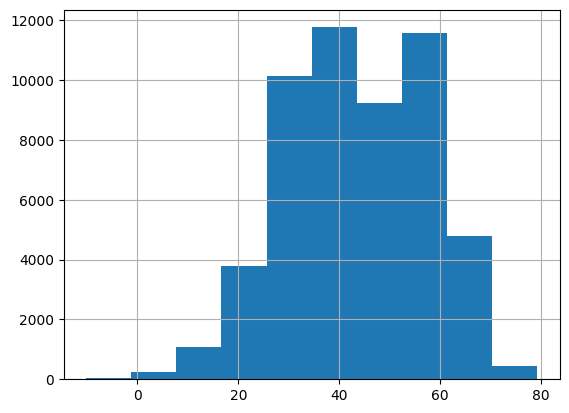

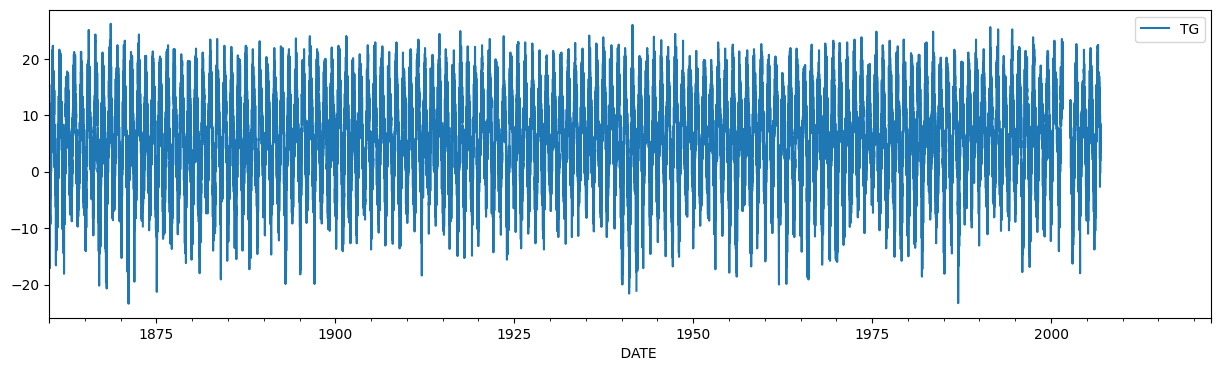

In [37]:
df["FH"].hist()
df.plot(x='    DATE', y='TG', figsize=(15, 4))